In [239]:
import pandas as pd
import numpy as np 
import re   
import warnings
warnings.filterwarnings('ignore')  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(17,7)}) 
plt.style.use('fivethirtyeight') # 

# The "Tarantino Dataset" by FiveThirtyEight 
### A Complete Catalog Of Every Time Someone Cursed Or Was Killed In A Quentin Tarantino Movie
https://www.kaggle.com/datasets/fivethirtyeight/cuss-words-and-deaths-in-quentin-tarantino-films

In [240]:
df=pd.read_csv('tarantino_csv.csv') 
df=df.fillna('')
df.head()

,movie,type,word,minutes_in
0,reservoir dogs,word,dick,0.40
1,reservoir dogs,word,dicks,0.43
2,reservoir dogs,word,fucked,0.55
3,reservoir dogs,word,fucking,0.61
4,reservoir dogs,word,bullshit,0.61


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1894 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [242]:
df['movie'].unique()

array(['reservoir dogs', 'pulp fiction', 'kill bill: vol. 1',
       'kill bill: vol. 2', 'inglorious basterds', 'django unchained',
       'jackie brown'], dtype=object)

In [243]:
top10=df.loc[df['type']=='word']['word'].value_counts()[:10] 
top10

fucking         407
shit            221
fuck            213
n-word          179
ass             140
goddamn         113
motherfucker     70
bitch            64
hell             45
damn             37
Name: word, dtype: int64

In [244]:
dfWords=df.loc[df['word'].isin(top10.index)] 
dfWords.head()

,movie,type,word,minutes_in
3,reservoir dogs,word,fucking,0.61
5,reservoir dogs,word,fuck,0.66
6,reservoir dogs,word,shit,0.90
7,reservoir dogs,word,fuck,1.43
9,reservoir dogs,word,fuck,1.66


Text(0.5, 1.0, 'SWEAR DISTRIBUTION')

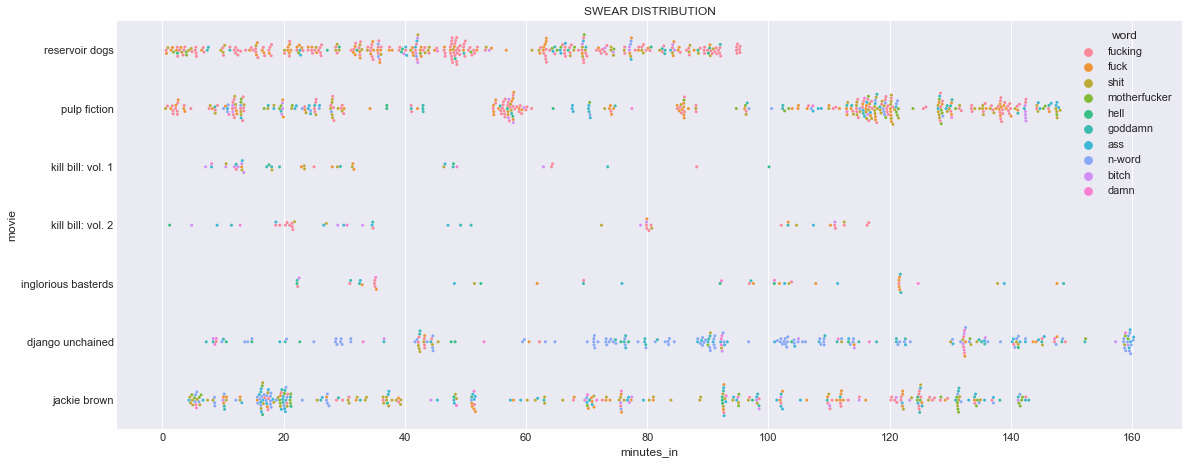

In [245]:
sns.swarmplot(data=dfWords, x="minutes_in", y="movie", hue='word', size=3).set_title("SWEAR DISTRIBUTION")

Text(0.5, 1.0, 'SWEAR COUNTS HISTOGRAM')

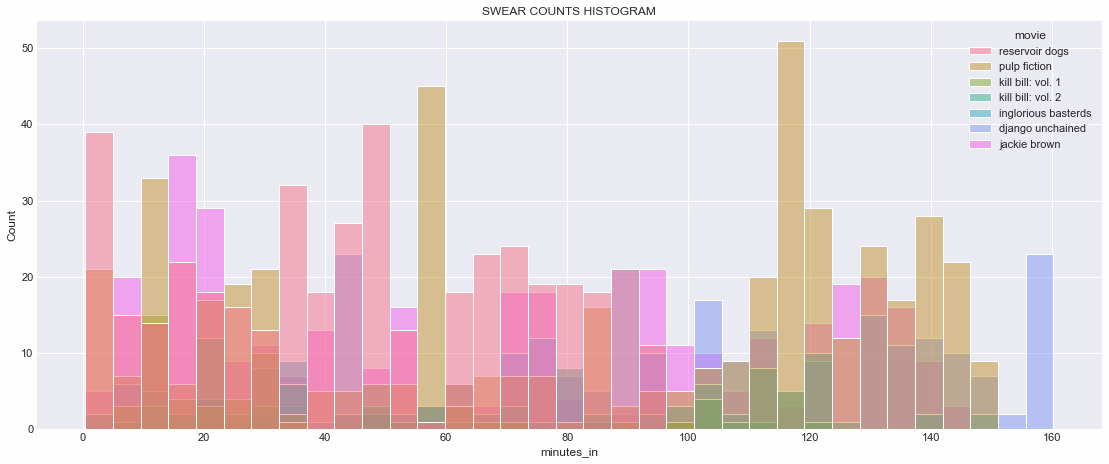

In [246]:
sns.histplot(data=df.loc[df['type']=='word'], x="minutes_in", hue='movie', bins=35 ).set_title("SWEAR COUNTS HISTOGRAM")

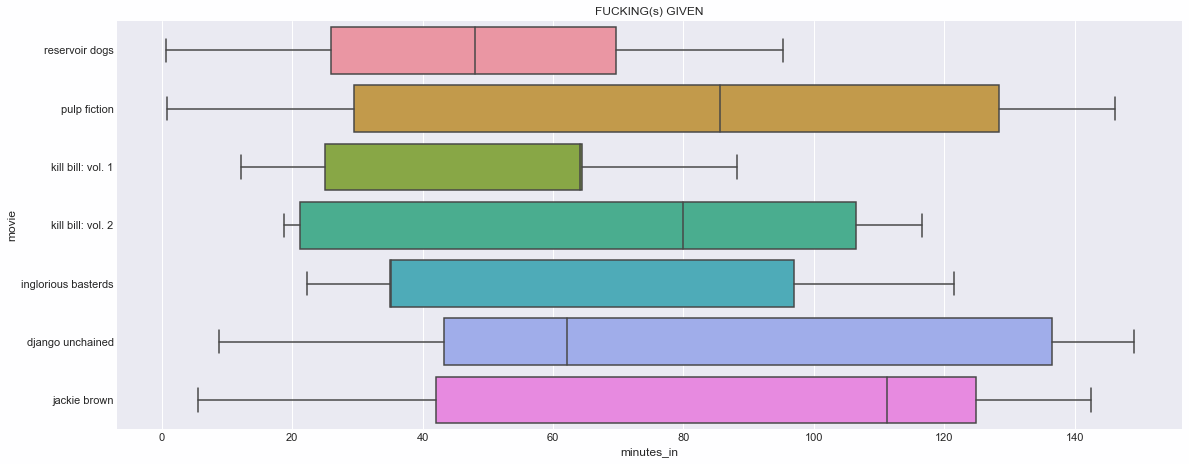

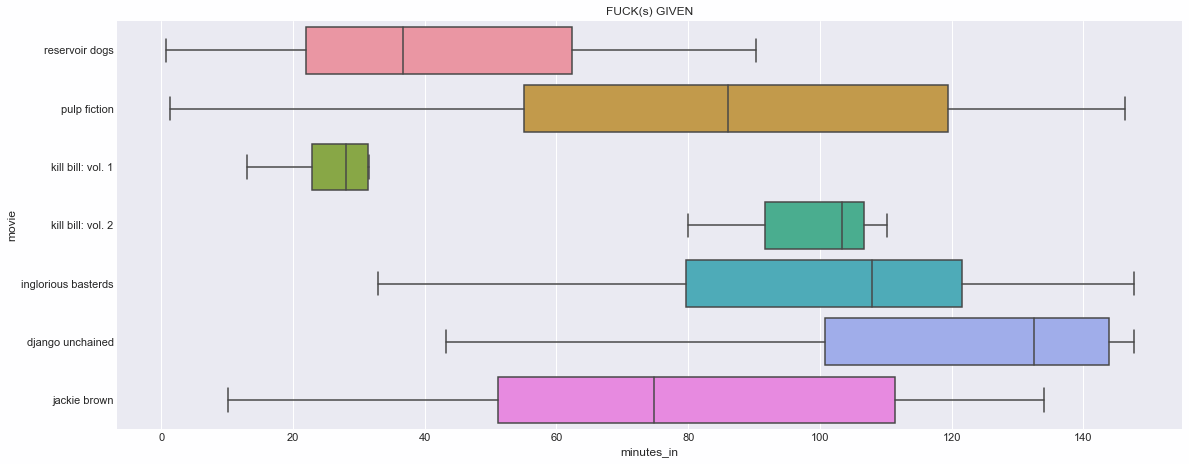

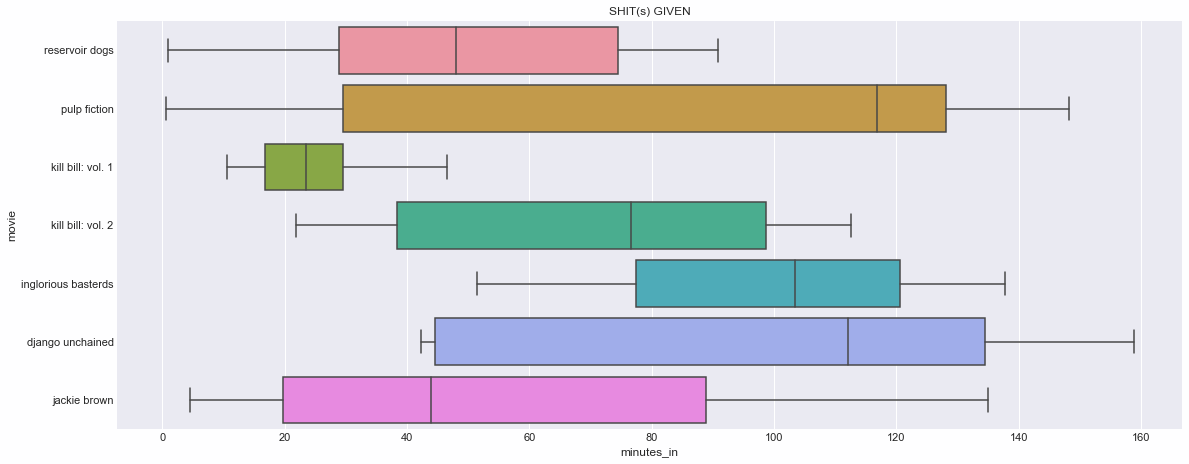

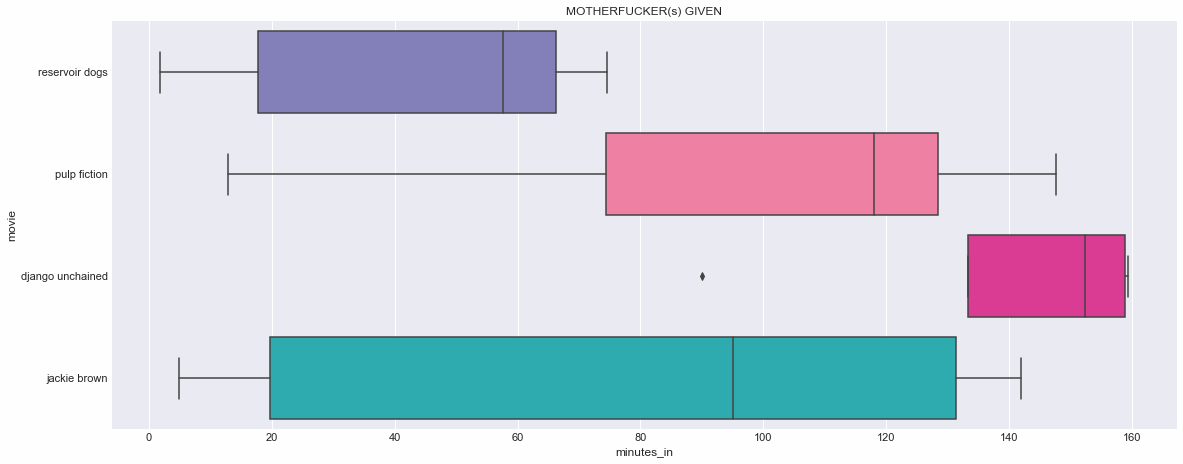

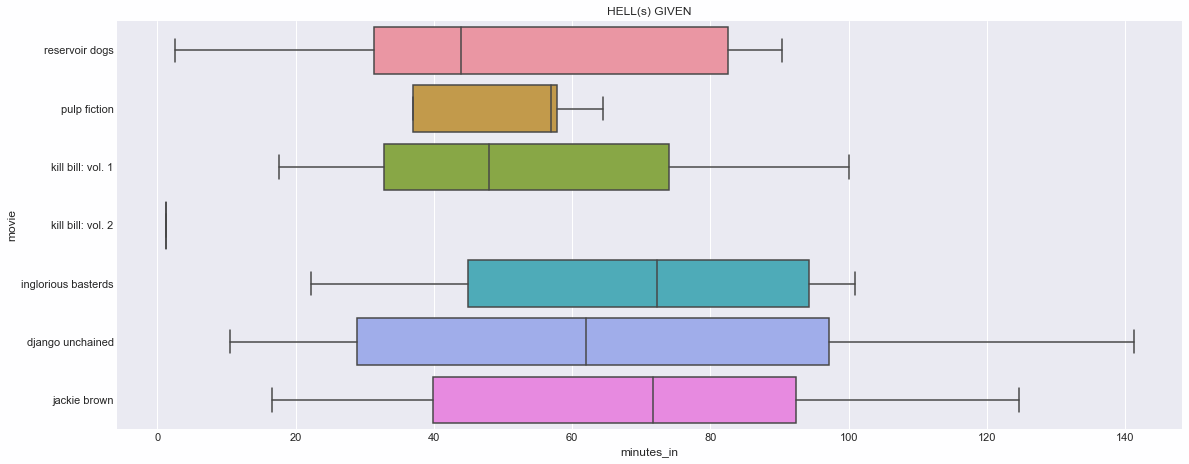

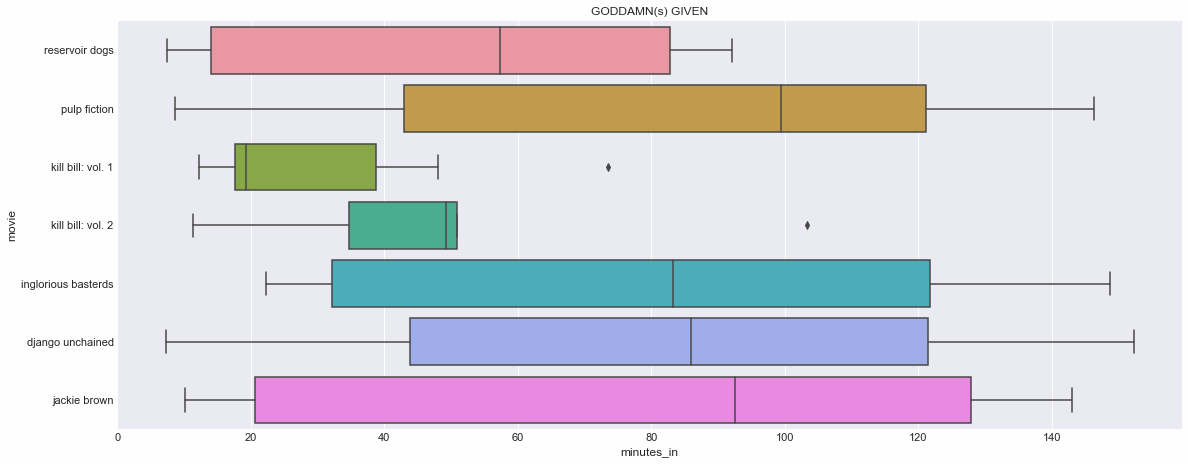

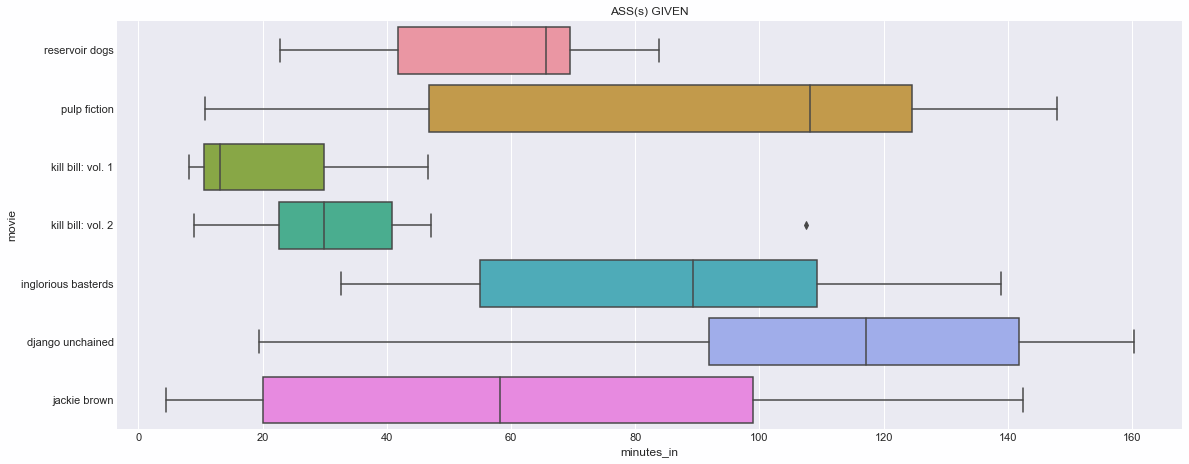

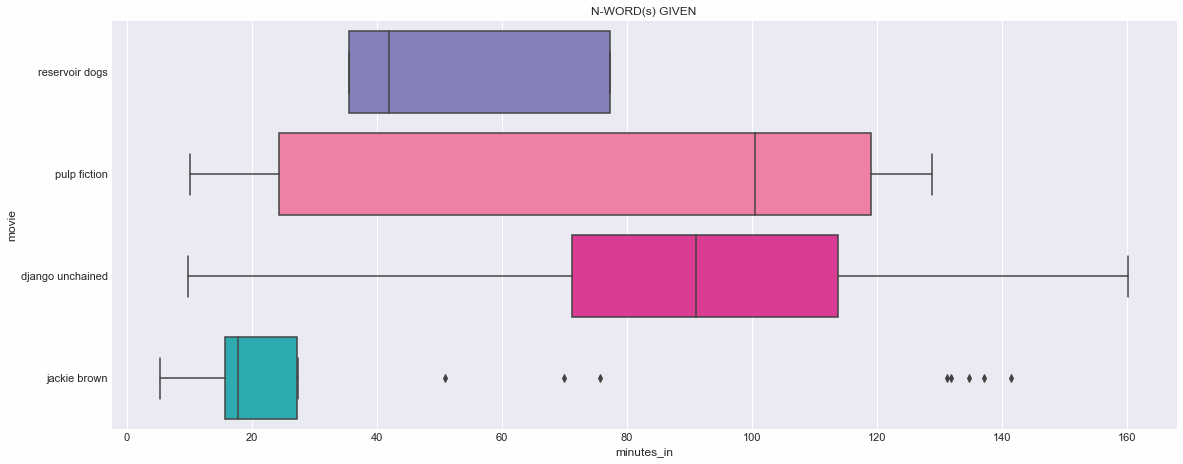

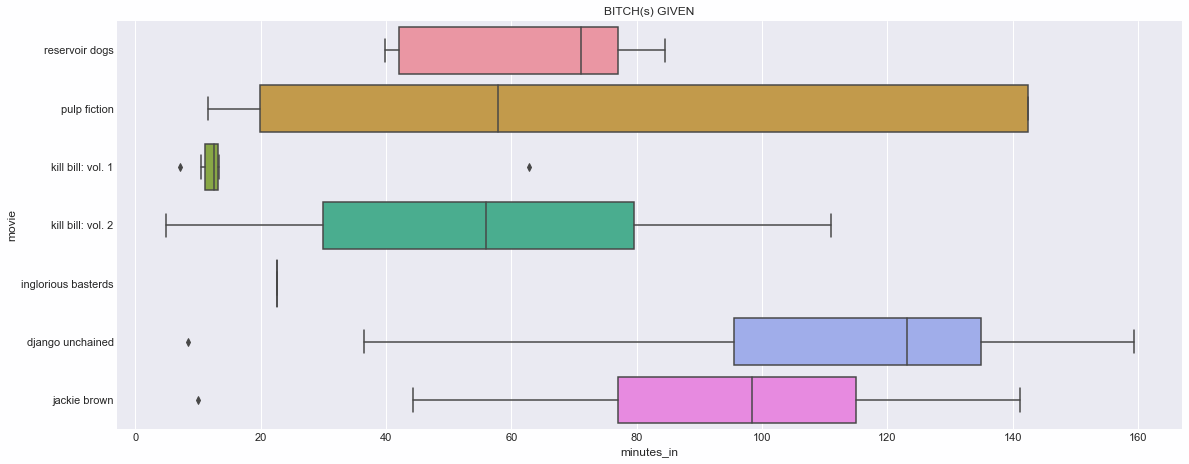

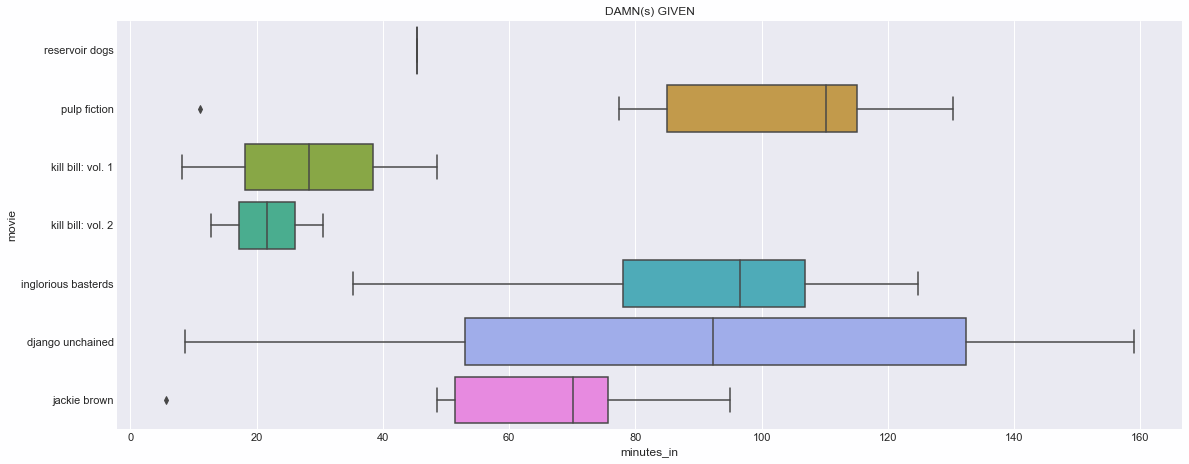

In [247]:
for w in dfWords['word'].unique(): 
    d = df.loc[df['word']==w] 
    plt.figure(w)
    sns.boxplot(data=d , x='minutes_in', y='movie').set_title(w.upper() + '(s) GIVEN')

# DEATH

<AxesSubplot:xlabel='movie', ylabel='death count'>

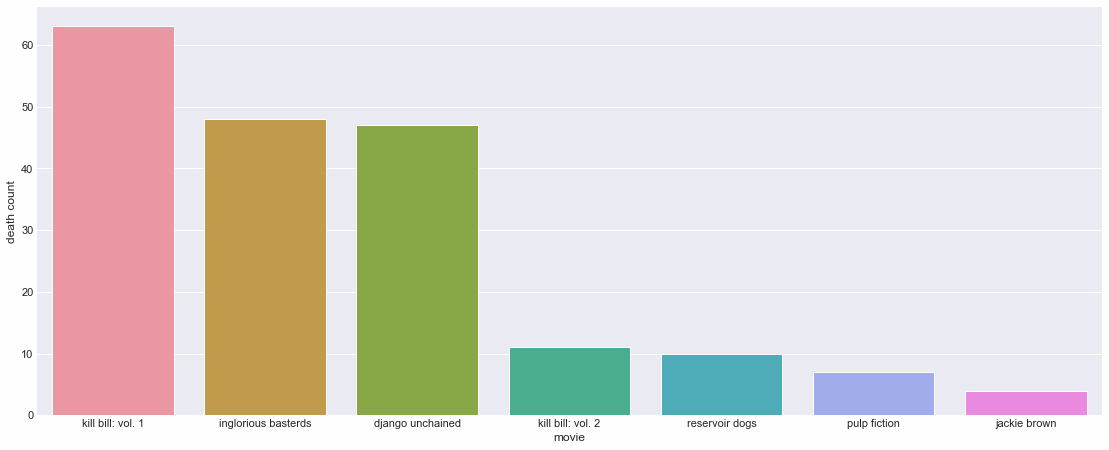

In [248]:
group=df.loc[df['type']=='death'].groupby('movie', as_index=False).count()
group.sort_values('type', inplace=True, ascending=False) 
group['death count']=group['type'] 
sns.barplot(data=group, y='death count', x='movie' )

Text(0.5, 1.0, 'DEATH BY MINUTES IN')

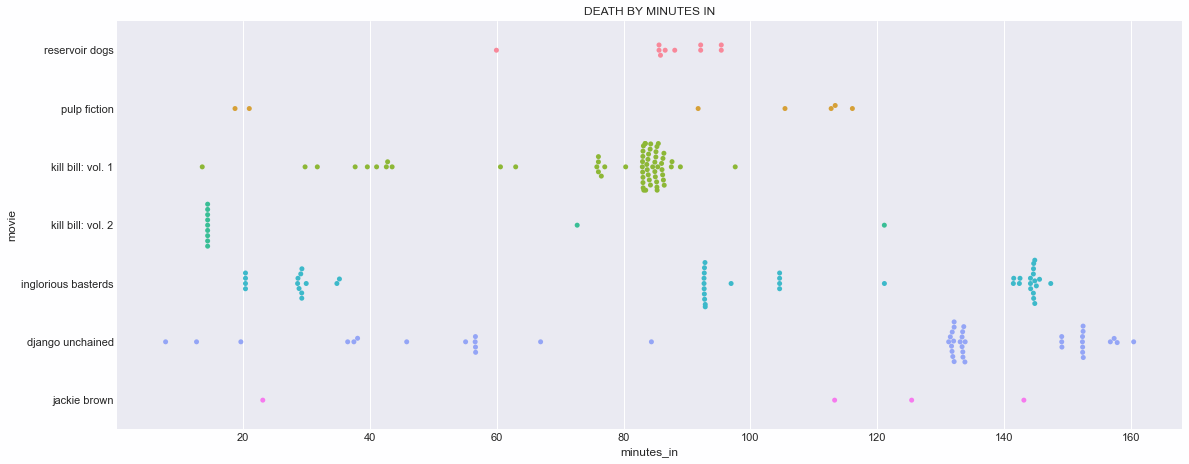

In [249]:
death=df.loc[df['type']=='death']
sns.swarmplot(data=death, x="minutes_in", y="movie").set_title('DEATH BY MINUTES IN')

Text(0.5, 1.0, 'DEATH COUNTS ALL FILMS')

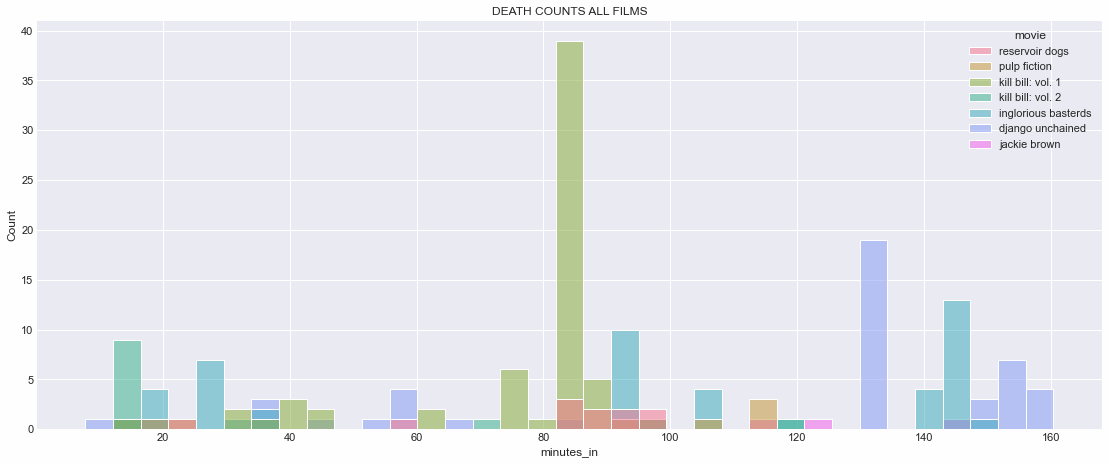

In [250]:
sns.histplot(data=df.loc[df['type']=='death'], x="minutes_in", hue='movie', bins=35 ).set_title("DEATH COUNTS ALL FILMS")